In [1]:
# model is based on the paper Macroeconomic Default Modeling and Stress Testing
# by Dietske Simons and Ferdinand Rolwes from De Nederlandsche Bank


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import data
DR = pd.read_csv('Default rate.csv')
DR.head(3)

,ReferenceDate,Default Rate
0,2010-12-31,1.988479
1,2011-03-31,2.329181
2,2011-06-30,1.477907


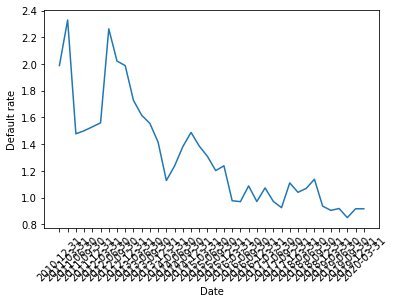

In [2]:
plt.ylabel('Default rate')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(DR['ReferenceDate'], DR['Default Rate'], )
plt.show()

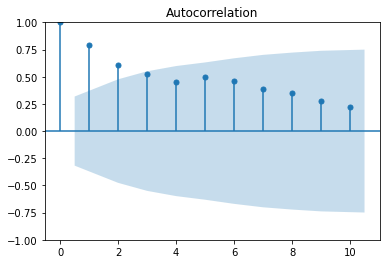

In [3]:
# Check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

# number of lags
n = 10

# confidence interval
p = 0.05

# plot the auto correlation
plot_acf(DR['Default Rate'], lags=n, alpha = p)
plt.show()

In [4]:
# based on the graph above we can see that both the first and the second order autocorrelation
# coefficients are statistically significant at the 5% level, hence we would need to incorporate them
# in the model and use the ARX model


# import parameter data

# Data from https://data.stat.gov.rs/AdvancedSearch?languageCode=sr-Latn
bdp = pd.read_csv('bdp_rast.csv')

# Data from https://nbs.rs/sr_RS/drugi-nivo-navigacije/statistika/ks_stat/
ks = pd.read_csv('kamatne stope.csv')
kr = pd.read_csv('kurs.csv')

# Data from https://finance.yahoo.com/quote/CL=F/
oil = pd.read_csv('oil.csv')

In [5]:
# create a parameter array
T=ks.shape[0]
param1=np.zeros((T, 3))
param1[:,0]=ks['Kamatna stopa '].values
param1[:,1]=kr['Kurs'].values
param1[:,2]=oil['Adj Close**'].values


In [6]:
# average the monthly into quarterly data
t=int(T/3)
param2=np.zeros((t, 4))
for i in range(t):
    for j in range(3):
        param2[i,j]=(param1[i,j]+param1[i+1,j]+param1[i+2,j])/3
param2[:,3]=bdp['Stope realnog rasta'].values

In [7]:
# the next step would be to separate the data into the training data and the testing data
# Training data woud be used to determine the coefficients of an ARX model
# Then these coefficients would be used to make a forecast on the testing data